# Task
- For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

## Project 1 Revisited - Part 2: Global Explanations
## Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

## Explain your tree-based model with Shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
  - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
    - Are they the same features in both? If not, what's different?
  - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
  - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
  - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Update your README.
- Insert your exported figures and corresponding interpretations from above into your README file. You should have:
- a summary plot - bar version
  - Your comparison of most important features found by shap vs feature importance.
- a summary plot - dot version
  - Your interpretation of the top 3 most important features and how they influence your model's predictions.

# Imports

In [1]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load JobLib File

In [2]:
loaded = joblib.load('Best_Models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

## Save as Separate Variables

In [3]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
lin_reg = loaded['LinearRegression']
dec_tree = loaded['DecisionTreeRegressor']

# Using SHAP

## Create X_shap and y_shap variables

In [4]:
len(X_train_df)

6392

In [5]:
X_shap = shap.sample(X_train_df, nsamples = 6392, random_state = 42)
X_shap.head()

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP
4776,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.350,0.029565,256.4646
7510,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.250,0.000000,179.7660
5828,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.350,0.158716,157.2946
5327,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.975,0.014628,82.3250
4810,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.350,0.016645,120.9098


In [6]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

## Create a SHAP explainer 

In [7]:
explainer = shap.Explainer(dec_tree)
explainer

## Calculate SHAP Values

In [8]:
## Getting the shap values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
shap_values.shape

(6392, 43)

In [10]:
shap_values[0]

.values =
array([-1.15325433e+01, -6.21734050e+01, -9.28112912e+02,  9.58910600e+00,
       -4.06899491e+00, -5.74462726e+00, -1.50925690e+00, -6.52853471e-01,
       -1.89713452e+00, -4.53169672e+00, -2.40789852e+00, -1.16347926e+01,
       -1.11261995e+00, -4.85068247e-01, -6.71013951e+02, -2.02802269e+00,
       -7.96104336e-01, -7.66110818e-01, -1.62191611e+01,  3.00047629e+00,
        3.41035733e+00,  3.85184486e-02, -2.24320720e+00, -3.35636720e+00,
       -1.26444349e+00,  9.04225525e-01, -8.42523539e+00,  5.12280632e-01,
       -2.28404252e+00,  1.33715608e+00, -2.02234861e+00, -2.14924936e+01,
       -3.99847618e+00, -1.85896251e-01,  1.49564696e-02, -4.25346772e+00,
       -2.92046074e+00, -4.51454916e+00, -7.87284962e+00, -3.25567800e+01,
       -4.35827887e+02, -1.97325685e+02,  7.43774108e+02])

.base_values =
array([2209.9793572])

.data =
array([1.0000000e+00, 2.0000000e+00, 2.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,


In [11]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP
0,-11.532543,-62.173405,-928.112912,9.589106,-4.068995,-5.744627,-1.509257,-0.652853,-1.897135,-4.531697,...,-0.185896,0.014956,-4.253468,-2.920461,-4.514549,-7.872850,-32.556780,-435.827887,-197.325685,743.774108
1,61.540930,0.183206,-24.602718,6.054694,0.120976,-1.721280,-0.478475,-0.913961,29.695960,-2.536933,...,0.200423,0.014554,-6.666640,-3.593471,-45.746160,-47.517354,-39.914205,255.510396,487.088723,651.152340
2,-5.953296,-5.860868,86.462860,-3.853965,-10.854360,-21.726191,-0.509767,-0.388503,-1.428124,1.868467,...,-0.189599,0.022390,31.715423,-4.364204,2.121532,2.561237,5.735101,-23.269399,-405.742175,41.567351
3,16.838337,30.139807,160.199685,-3.552497,-0.522581,37.491458,2.582882,2.612809,12.890044,0.523073,...,-0.665204,0.011551,-1.385454,3.122437,35.576716,0.186120,5.619527,31.922319,-135.340768,-1014.312011
4,-1.022735,4.860706,200.285356,-7.993236,4.448477,-1.879772,2.185726,0.530701,-1.360258,5.111898,...,0.089354,0.016380,19.493515,7.448984,-7.912048,-4.335501,13.077895,-42.166456,29.565827,-303.730479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-2.906547,-1.400159,-2532.289884,0.923211,-0.030328,-1.527687,-1.013585,0.004260,1.829718,0.020955,...,-2.974506,-0.048157,-3.159795,-2.242268,-1.171626,-1.070335,36.924691,11.108474,433.665689,150.885201
6388,2.675520,15.593964,152.439858,-4.807346,-4.887084,-3.229529,-0.581701,-0.155228,15.487548,1.952532,...,-1.599875,0.024205,-0.277326,0.837633,-1.706911,57.046292,-15.091900,-99.108779,8.625563,-962.042068
6389,-42.317077,293.821145,517.138142,-9.426084,-4.550848,-4.875254,1.375868,-0.154805,0.702309,6.390759,...,-0.706395,0.024194,12.328152,11.197935,-4.559064,-6.284013,6.932895,126.119125,623.777365,2502.496802
6390,-18.169120,-2.438301,159.482442,-1.895953,52.711126,-3.275367,-0.343657,-0.207239,-3.080097,2.154174,...,-1.482916,0.015297,-1.671075,0.994806,0.931940,52.024190,-60.454428,49.977550,-381.777630,-496.479442


## Summary Bar Plot

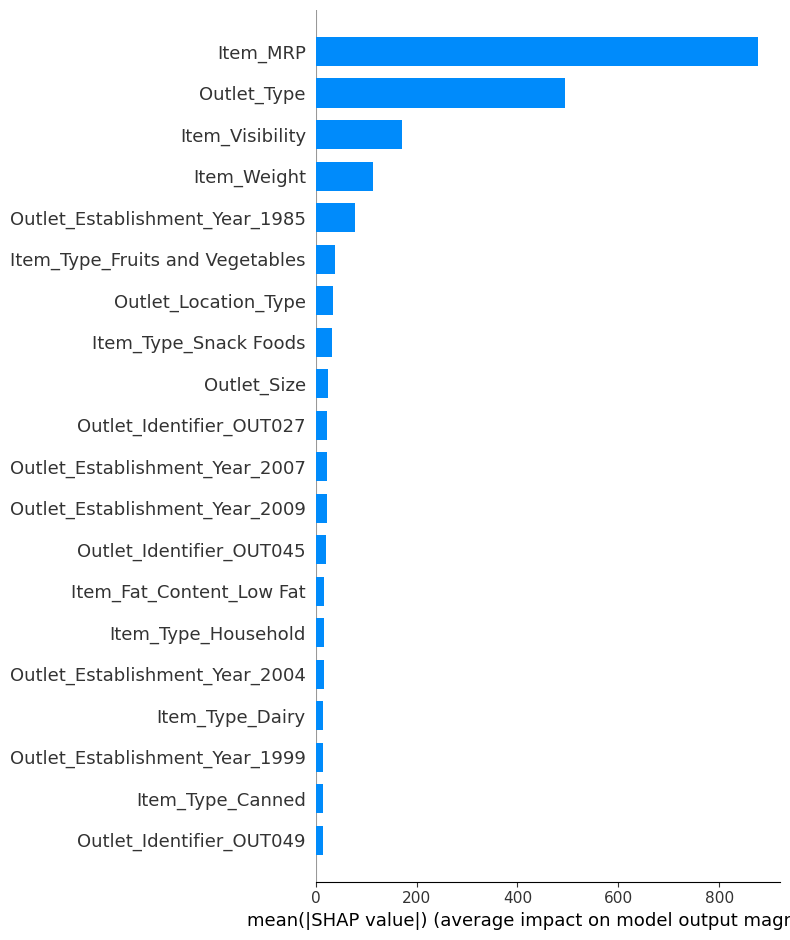

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap,  plot_type = 'bar')
ax.set_title('Decision Tree SHAP Bar Plot');

## Save File

In [13]:
fig.savefig('Images/Dec_Tree_SHAP_Bar_Plot.png', bbox_inches = 'tight')

## Analysis and Comparison

<img src='Images/Dec_Tree_5_Most_Important_Features.png'>
The Feature Importance and the SHAP output have the same top 5 features in the same order of importance. That means that regardless of how those items are analyzed, they are the most impactful features the the model.

## Summary Dot Plot

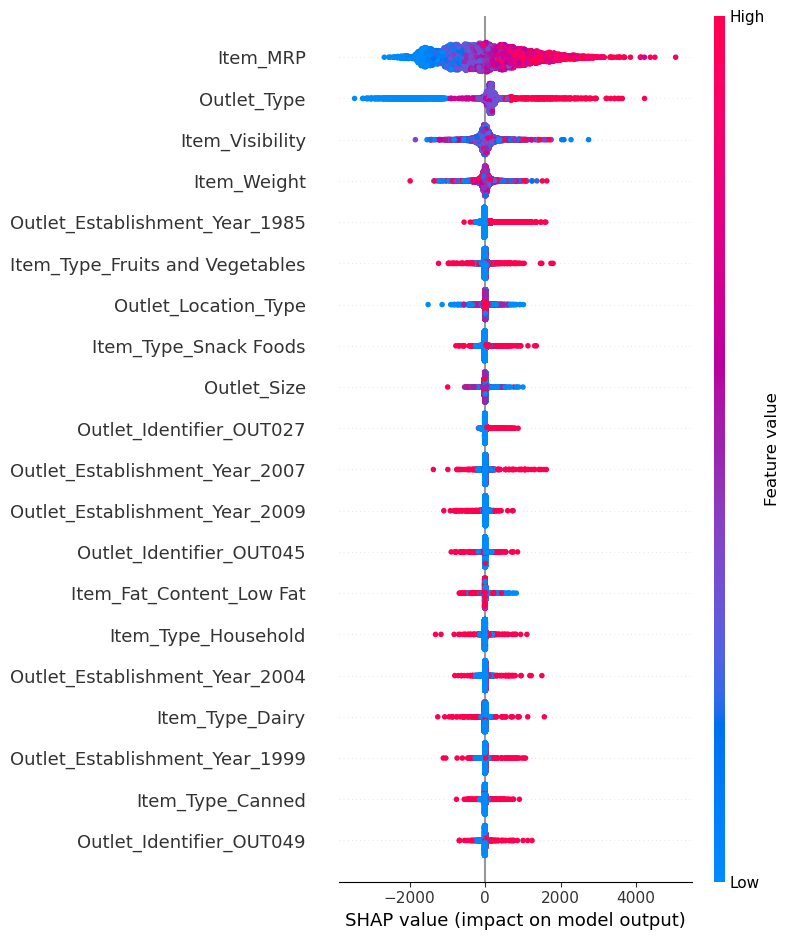

In [14]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap)
ax.set_title('Decision Tree SHAP Dot Plot');

## Save File

In [15]:
fig.savefig('Images/Dec_Tree_SHAP_Dot_Plot.png', bbox_inches = 'tight')

## Analysis

The top 3 items on the dot plot are `Item_MRP`, `Outlet_Type` and `Item_Visibility`.

`Item_MRP`:
- The higher the MRP the more money is made. These items will have a linear relationship.

`Outlet_Type`:
- The type of store determines has an direct impact on the profit. This also has a linear relationship with the target.

`Item_Visibility`:
- Based on the plot, the visibility of an item has little impact on the profit of the item. There are items that have high profits, but low visibility and vice versa.  